# Machine Learning

In [93]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set_theme(style="white", palette=None)

# machine learning for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score

# deep learning for ANN
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

2022-11-11 22:50:28.660231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 22:50:28.859356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 22:50:28.859378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-11 22:50:28.879261: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-11 22:50:29.376126: W tensorflow/stream_executor/platform/de

#### Read Files

In [94]:
train_df = pd.read_csv("./train.csv")
train_df_oversampled = pd.read_csv("./train_oversampled.csv")
train_df_smoten = pd.read_csv("./train_smoten.csv")
test_df = pd.read_csv("./test.csv")

In [95]:
test_df.head()

,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_white,subject_sex_female,subject_sex_male,contraband_found_False,contraband_found_True,contraband_found_search not conducted,...,search_vehicle_True,reason_for_stop_Assistance to Motorist,reason_for_stop_BOLO/APB/Warrant,reason_for_stop_DUI Check,reason_for_stop_MPC Violation,reason_for_stop_Mechanical or Non-Moving Violation (V.C.),reason_for_stop_Moving Violation,reason_for_stop_Traffic Collision,ageband,outcome
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1


In [96]:
X_test = pd.DataFrame(test_df.loc[:, test_df.columns!= "outcome"])
y_test = pd.DataFrame(test_df.loc[:, "outcome"])

### Model Training and Evaluation

#### Function for model evaluation

In [97]:
def evaluate_model(y_train,y_train_pred, y_test, y_test_pred):
    # Print the Classification Report
    precision_train ,recall_train ,fscore_train , _ = score(y_train,y_train_pred, average="binary")
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    stats_train = "Accuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 score={:0.2f}".format(
            accuracy_train, precision_train, recall_train, fscore_train)
    
    precision_test ,recall_test ,fscore_test , _ = score(y_test,y_test_pred, average="binary")
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    stats_test = "Accuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 score={:0.2f}".format(
            accuracy_test, precision_test, recall_test, fscore_test)
    # Plot the 2 by 2 Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
    axes[0].set_title("Train data", fontsize="large")
    axes[1].set_title("Test data", fontsize="large")
    axes[0].set_xlabel(stats_train, fontsize="large")
    axes[1].set_xlabel(stats_test, fontsize="large")
    
    return [[accuracy_train, precision_train, recall_train, fscore_train],
            [accuracy_test, precision_test, recall_test, fscore_test]]
    
# table for storing results
results = {}

#### Function for training decision tree model using K-fold cross-validation

In [98]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring, verbose=1)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

#### Function for plotting K-fold cross-validation results on decision tree model

In [99]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

#### Creating a model for outcome: Attempt 1 (Decision tree with depth=6 for imbalanaced data)

In [100]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "outcome"])
y_train = pd.DataFrame(train_df.loc[:, "outcome"])

##### Training and evaluating the model

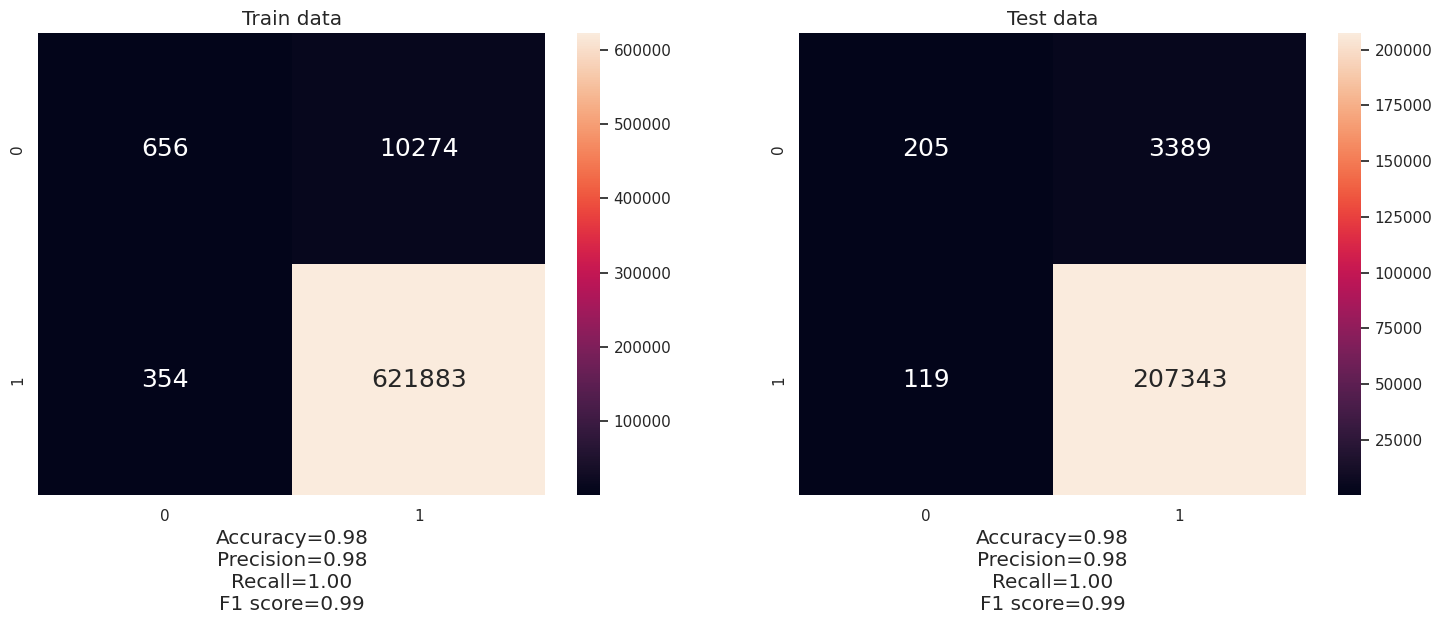

In [101]:
# Fitting the model
decision_tree = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

result_1 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["DT with Imbalanced"] = result_1

#### Creating a model for outcome: Attempt 2 (Decision tree with tuned hyperparameters using K-fold cross-validation for imbalanaced data)

##### Optimal hyperparamater searching and tuning

In [102]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "outcome"])
y_train = pd.DataFrame(train_df.loc[:, "outcome"])

# Fit the model
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

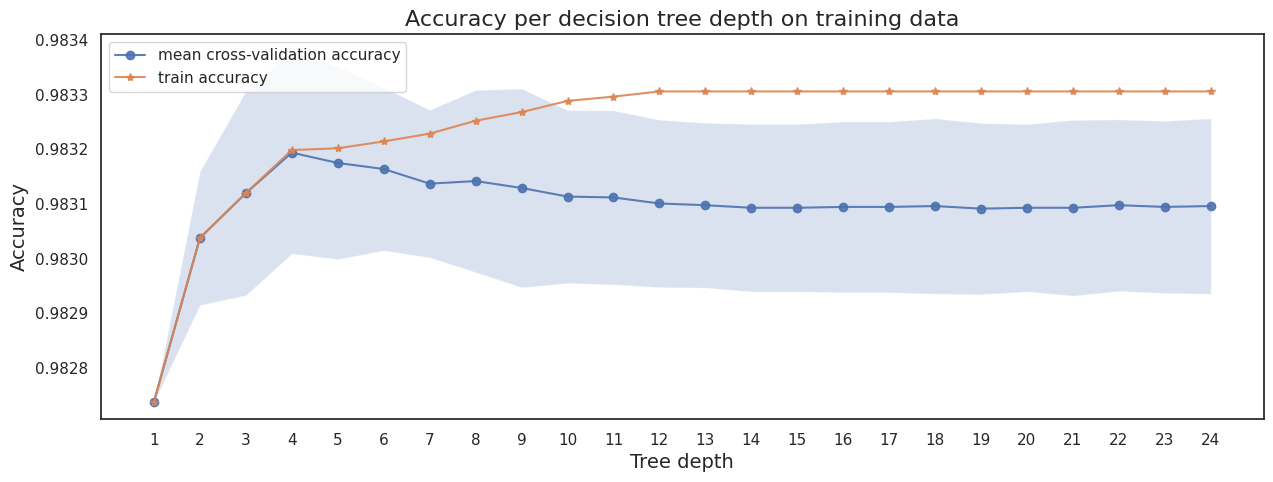

In [103]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [104]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-4 tree achieves the best mean cross-validation accuracy 98.3194 +/- 0.00924% on training dataset


##### Training and evaluating the model with the best hyperparameter

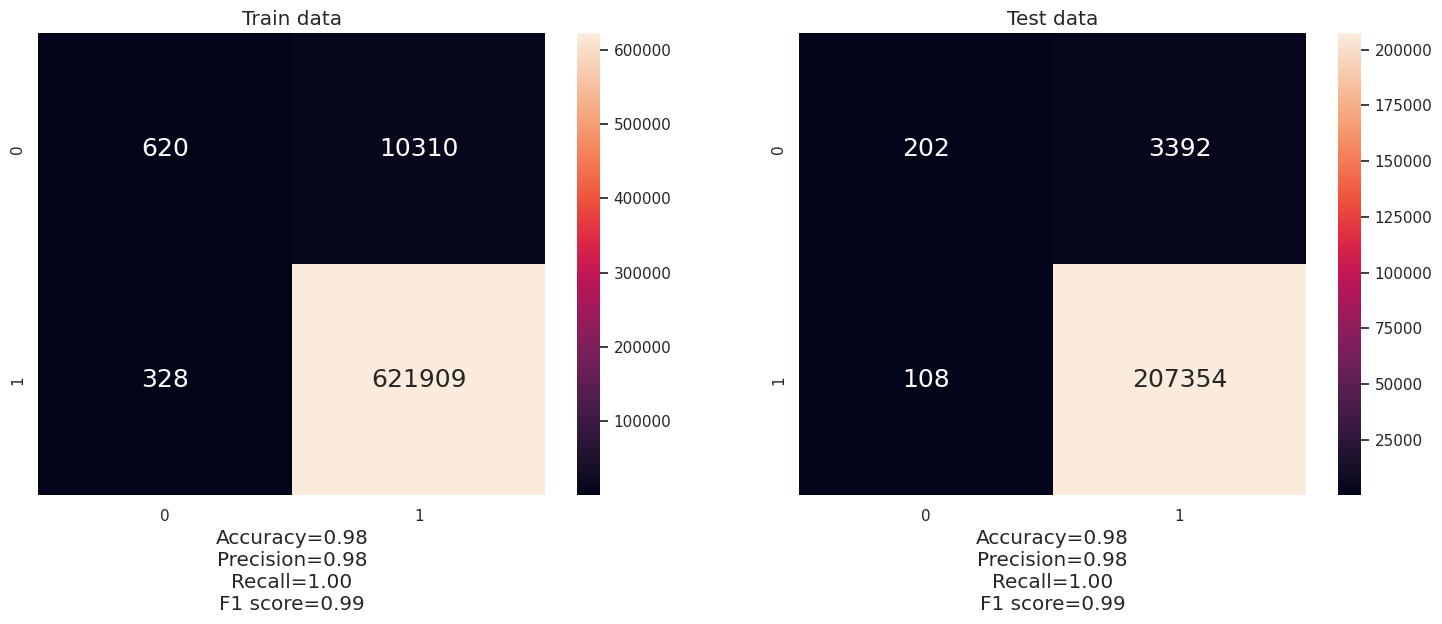

In [105]:
# Fitting the model
decision_tree_ori = DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = decision_tree_ori.predict(X_train)
y_test_pred = decision_tree_ori.predict(X_test)

result_2 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["DT with Imbalanced (optimal)"] = result_2

#### Creating a model for outcome: Attempt 3 (Decision tree with tuned hyperparameters using K-fold cross-validation for random oversampling data)

##### Optimal hyperparamater searching and tuning

In [106]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "outcome"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "outcome"])

# Fit the model
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_oversampled, y_train_oversampled, sm_tree_depths)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

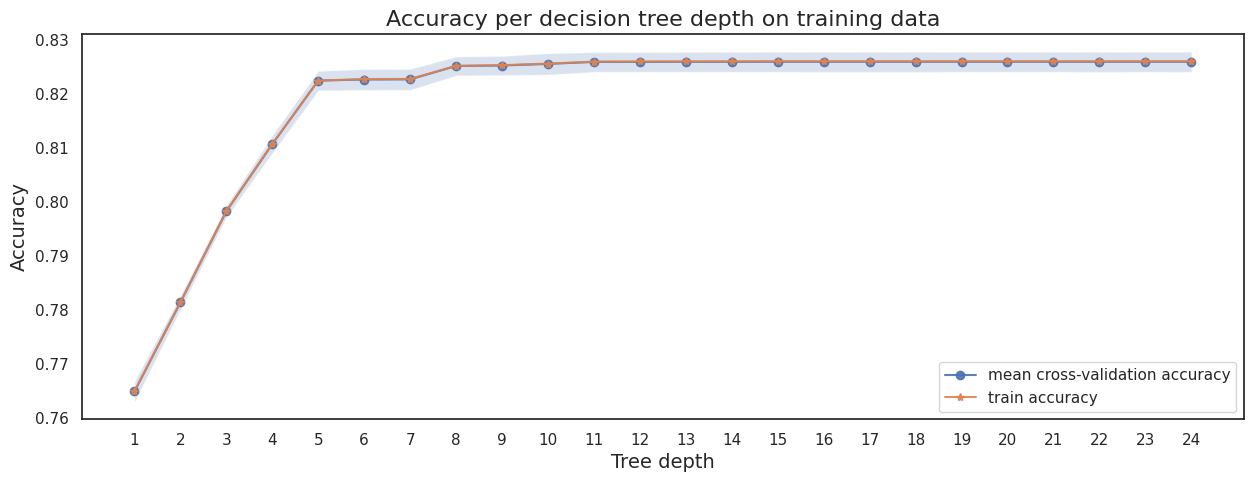

In [107]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [108]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-16 tree achieves the best mean cross-validation accuracy 82.59875 +/- 0.09274% on training dataset


##### Training and evaluating the model with the best hyperparameter

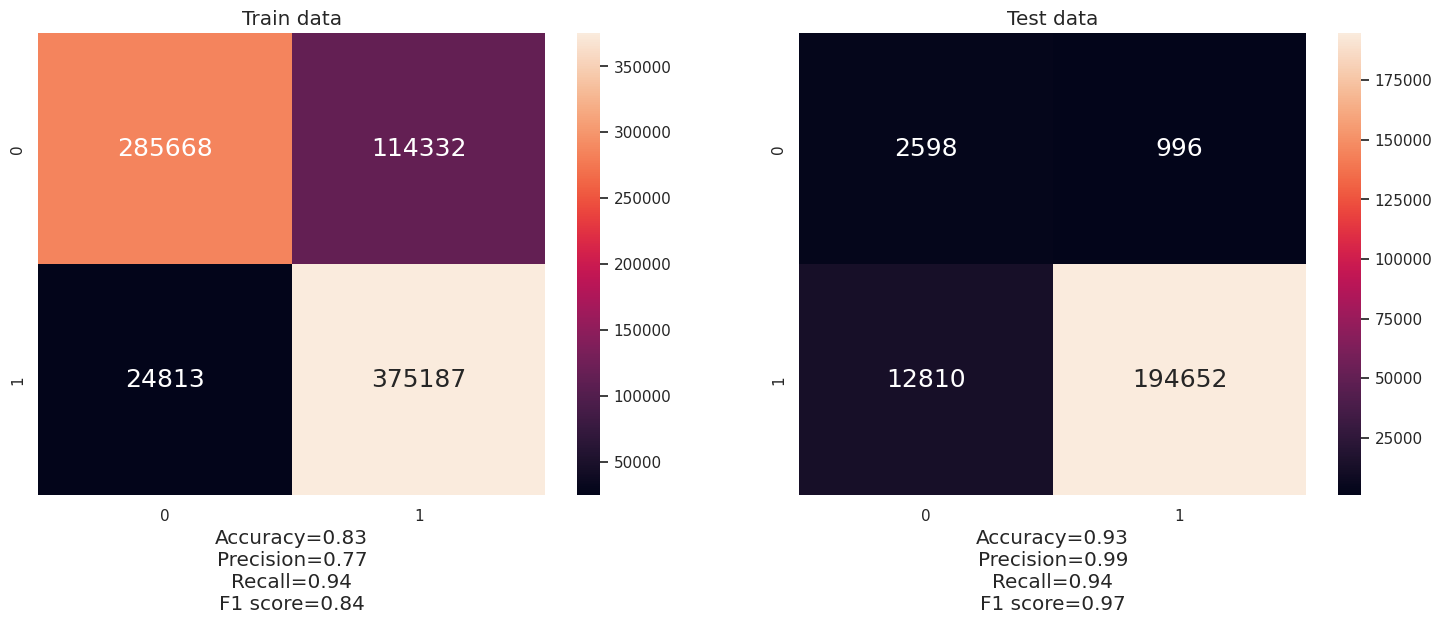

In [109]:
# Fitting the model
decision_tree_over = DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_train_oversampled, y_train_oversampled)

# Predict test data using the model created
y_train_oversampled_pred = decision_tree_over.predict(X_train_oversampled)
y_test_pred = decision_tree_over.predict(X_test)

result_3 = evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)
results["DT with Random Oversampling (optimal)"] = result_3

#### Creating a model for outcome: Attempt 4 (Decision tree with tuned hyperparameters using K-fold cross-validation for SMOTEN data)
##### Optimal hyperparamater searching and tuning

In [110]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "outcome"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "outcome"])

# Fit the model
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_smoten, y_train_smoten, sm_tree_depths)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

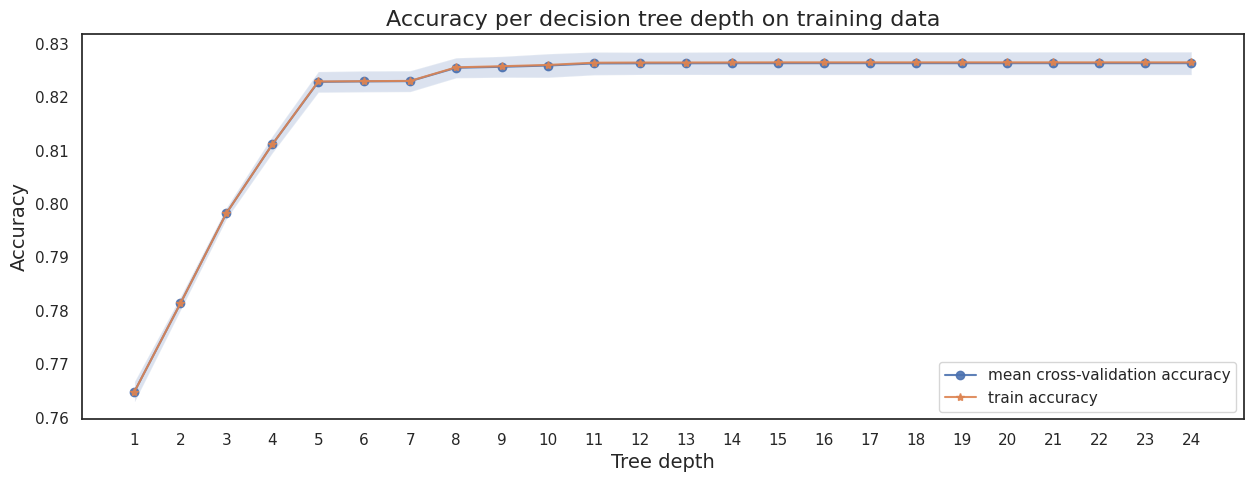

In [111]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [112]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-16 tree achieves the best mean cross-validation accuracy 82.64025 +/- 0.10699% on training dataset


##### Training and evaluating the model with the best hyperparameter

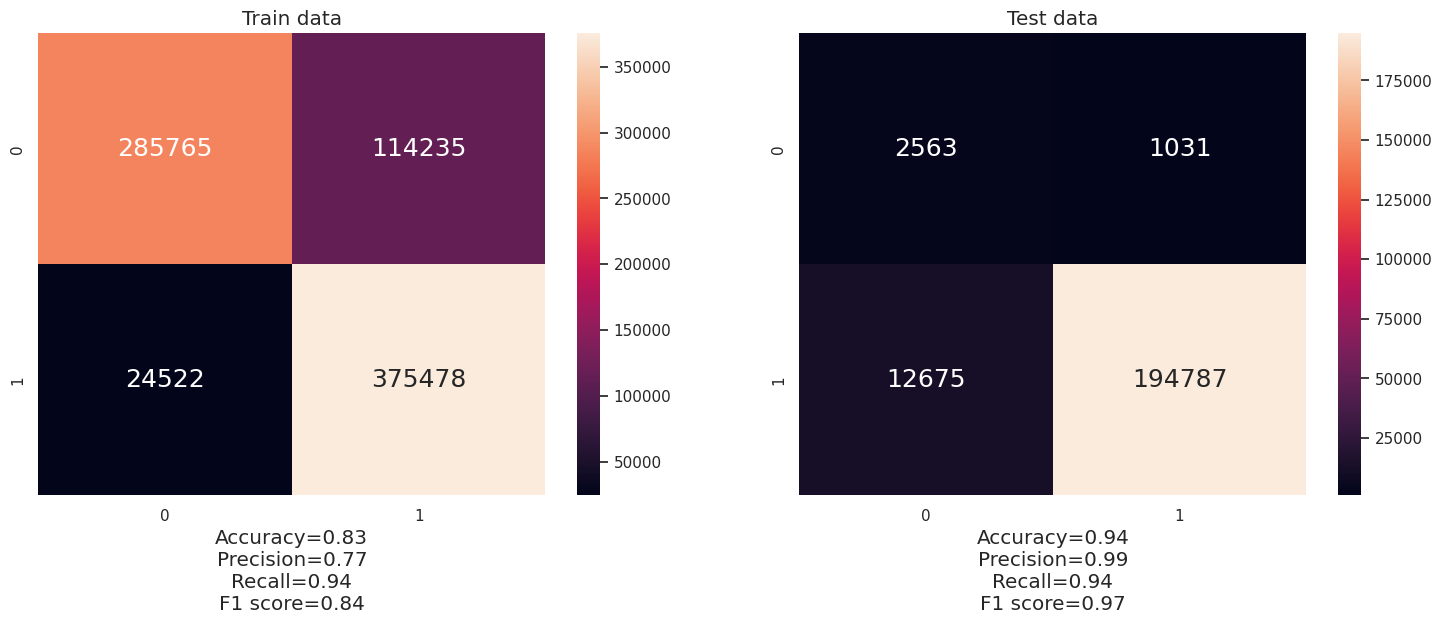

In [113]:
# Fitting the model
decision_tree_smoten = DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_train_smoten, y_train_smoten)

# Predict test data using the model created
y_train_smoten_pred = decision_tree_smoten.predict(X_train_smoten)
y_test_pred = decision_tree_smoten.predict(X_test)

result_4 = evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)
results["DT with SMOTEN (optimal)"] = result_4

#### Creating a model for outcome: Attempt 5 (Deep learning artificial neural network for imbalanced data)
##### Deep Learning Artificial Neural Network Architecture

In [114]:
# define the keras model
model_ori = Sequential()
model_ori.add(Dense(12, input_shape=(20,), activation='relu'))
model_ori.add(Dense(8, activation='relu'))
model_ori.add(Dense(1, activation='sigmoid'))

model_ori.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


2022-11-11 22:53:50.725007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-11 22:53:50.725160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 22:53:50.725198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-11 22:53:50.725226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-11 22:53:50.725249: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [115]:
# compile the keras model
model_ori.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
# Callback function
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=1, mode='auto')

In [117]:
train_df.shape

(633167, 21)

##### Training and evaluating the model

In [118]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "outcome"])
y_train = pd.DataFrame(train_df.loc[:, "outcome"])

# fit the keras model on the dataset
model_ori.fit(X_train, y_train, epochs=10, batch_size=32, callbacks = [early_stop_cb], verbose=1)

Epoch 1/10
19787/19787 [==============================] - 14s 706us/step - loss: 0.0622 - accuracy: 0.9829
Epoch 2/10
19787/19787 [==============================] - 13s 681us/step - loss: 0.0595 - accuracy: 0.9832
Epoch 3/10
19787/19787 [==============================] - 14s 689us/step - loss: 0.0594 - accuracy: 0.9832
Epoch 4/10
19787/19787 [==============================] - 14s 691us/step - loss: 0.0593 - accuracy: 0.9832
Epoch 5/10
19787/19787 [==============================] - 14s 694us/step - loss: 0.0593 - accuracy: 0.9832
Epoch 6/10
19787/19787 [==============================] - 14s 687us/step - loss: 0.0593 - accuracy: 0.9832
Epoch 7/10
19787/19787 [==============================] - 14s 687us/step - loss: 0.0592 - accuracy: 0.9832
Epoch 8/10
19787/19787 [==============================] - 14s 704us/step - loss: 0.0592 - accuracy: 0.9832
Epoch 9/10
19787/19787 [==============================] - 14s 692us/step - loss: 0.0592 - accuracy: 0.9832
Epoch 9: early stopping


6596/6596 [==============================] - 3s 497us/step


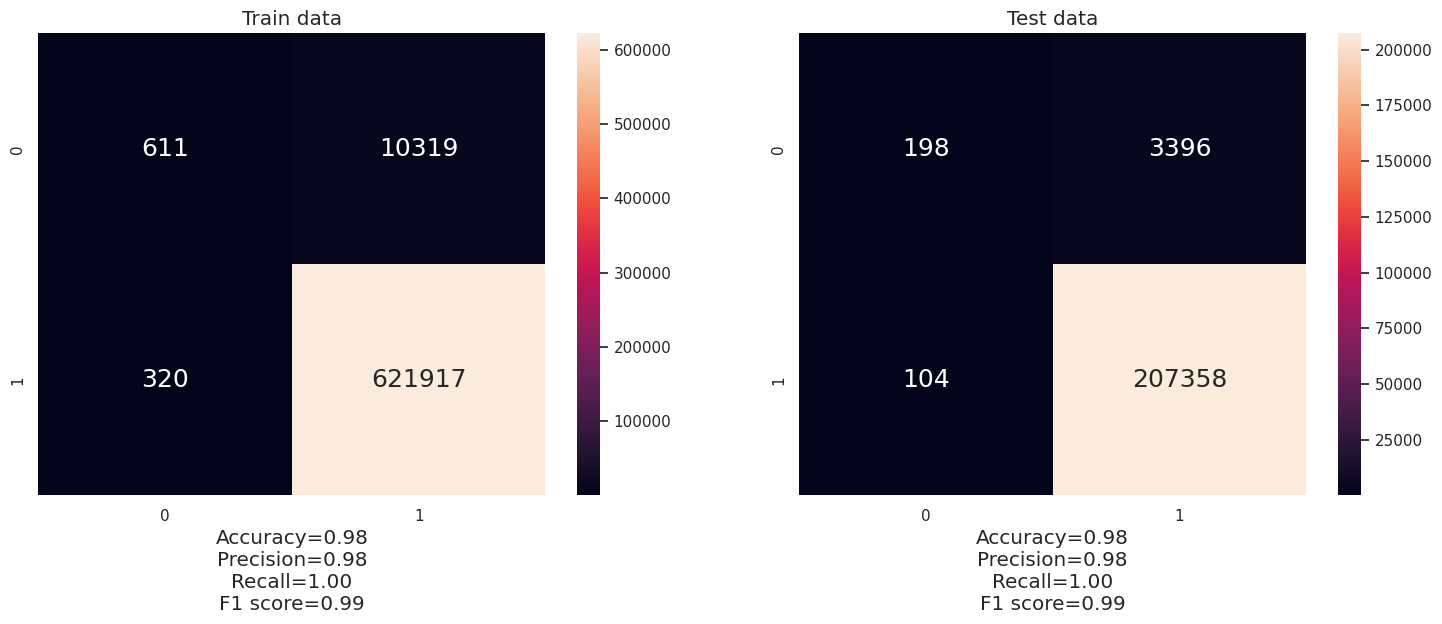

In [119]:
# Predict test data using the model created
y_train_pred = model_ori.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_test_pred = model_ori.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

result_5 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["ANN with Imbalanced"] = result_5

#### Creating a model for outcome: Attempt 6 (Deep learning artificial neural network for random oversampling data)
##### Deep Learning Artificial Neural Network Architecture

In [120]:
# define the keras model
model_over = Sequential()
model_over.add(Dense(12, input_shape=(20,), activation='relu'))
model_over.add(Dense(8, activation='relu'))
model_over.add(Dense(1, activation='sigmoid'))

model_over.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                252       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [121]:
# compile the keras model
model_over.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
# Callback function
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=1, mode='auto')

##### Training and evaluating the model

In [123]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "outcome"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "outcome"])

# fit the keras model on the dataset
model_over.fit(X_train_oversampled, y_train_oversampled, epochs=10, batch_size=32, callbacks = [early_stop_cb], verbose=1)

Epoch 1/10
25000/25000 [==============================] - 17s 688us/step - loss: 0.4107 - accuracy: 0.8244
Epoch 2/10
25000/25000 [==============================] - 17s 681us/step - loss: 0.4082 - accuracy: 0.8252
Epoch 3/10
25000/25000 [==============================] - 17s 692us/step - loss: 0.4080 - accuracy: 0.8253
Epoch 4/10
25000/25000 [==============================] - 17s 684us/step - loss: 0.4077 - accuracy: 0.8251
Epoch 5/10
25000/25000 [==============================] - 17s 689us/step - loss: 0.4076 - accuracy: 0.8252
Epoch 6/10
25000/25000 [==============================] - 17s 686us/step - loss: 0.4075 - accuracy: 0.8250
Epoch 7/10
25000/25000 [==============================] - 17s 678us/step - loss: 0.4074 - accuracy: 0.8252
Epoch 8/10
25000/25000 [==============================] - 17s 682us/step - loss: 0.4073 - accuracy: 0.8251
Epoch 9/10
25000/25000 [==============================] - 17s 683us/step - loss: 0.4073 - accuracy: 0.8254
Epoch 10/10
25000/25000 [============

6596/6596 [==============================] - 3s 496us/step


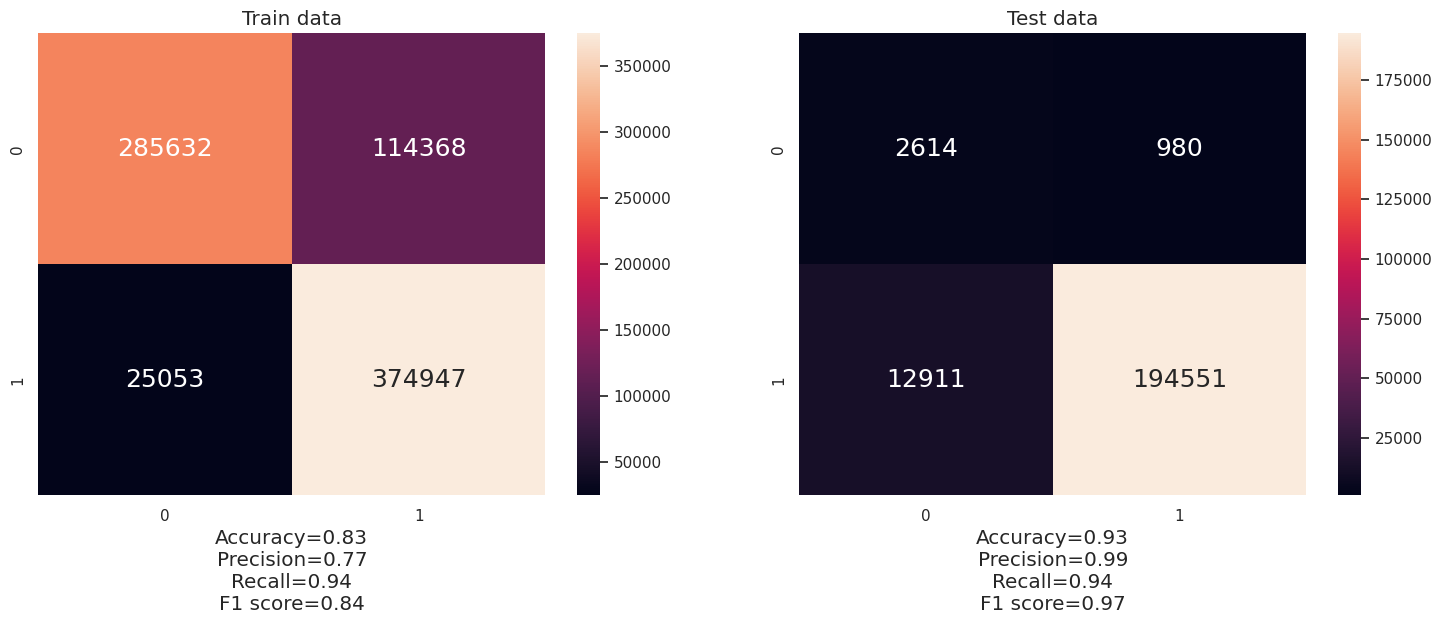

In [124]:
# Predict test data using the model created
y_train_oversampled_pred = model_over.predict(X_train_oversampled)
y_train_oversampled_pred = (y_train_oversampled_pred > 0.5)
y_test_pred = model_over.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

result_6 = evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)
results["ANN with Random Oversampling"] = result_6

#### Creating a model for outcome: Attempt 7 (Deep learning artificial neural network for SMOTEN data)

##### Deep Learning Artificial Neural Network Architecture

In [125]:
# define the keras model
model_smoten = Sequential()
model_smoten.add(Dense(12, input_shape=(20,), activation='relu'))
model_smoten.add(Dense(8, activation='relu'))
model_smoten.add(Dense(1, activation='sigmoid'))

model_smoten.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                252       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [126]:
# compile the keras model
model_smoten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [127]:
# Callback function
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=1, mode='auto')

##### Training and evaluating the model

In [128]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "outcome"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "outcome"])

# fit the keras model on the dataset
model_smoten.fit(X_train_smoten, y_train_smoten, epochs=10, batch_size=32, callbacks = [early_stop_cb], verbose=1)

Epoch 1/10
25000/25000 [==============================] - 17s 677us/step - loss: 0.4125 - accuracy: 0.8231
Epoch 2/10
25000/25000 [==============================] - 17s 685us/step - loss: 0.4079 - accuracy: 0.8250
Epoch 3/10
25000/25000 [==============================] - 17s 684us/step - loss: 0.4070 - accuracy: 0.8250
Epoch 4/10
25000/25000 [==============================] - 17s 684us/step - loss: 0.4065 - accuracy: 0.8250
Epoch 5/10
25000/25000 [==============================] - 17s 689us/step - loss: 0.4062 - accuracy: 0.8249
Epoch 6/10
25000/25000 [==============================] - 17s 685us/step - loss: 0.4059 - accuracy: 0.8252
Epoch 7/10
25000/25000 [==============================] - 17s 684us/step - loss: 0.4058 - accuracy: 0.8249
Epoch 8/10
25000/25000 [==============================] - 17s 687us/step - loss: 0.4056 - accuracy: 0.8252
Epoch 9/10
25000/25000 [==============================] - 17s 700us/step - loss: 0.4056 - accuracy: 0.8252
Epoch 10/10
25000/25000 [============

6596/6596 [==============================] - 3s 493us/step


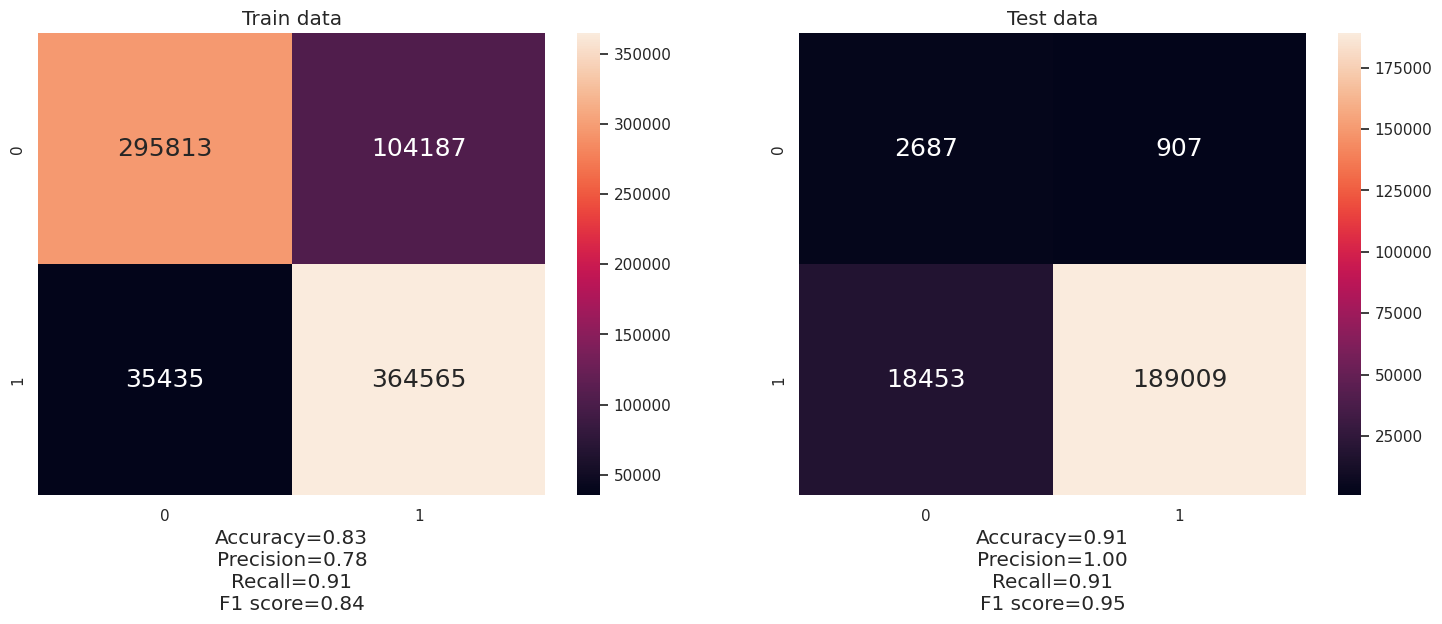

In [129]:
# Predict test data using the model created
y_train_smoten_pred = model_smoten.predict(X_train_smoten)
y_train_smoten_pred = (y_train_smoten_pred > 0.5)
y_test_pred = model_smoten.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

result_7 = evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)
results["ANN with SMOTEN"] = result_7

### Summary of model training and evaluation

#### Function to plot bar charts for summarizing models

In [130]:
def summarize_model(df_train, df_test ,scorer):
    f, axes = plt.subplots(2,1, figsize=(18, 15))
    title1 = f"{scorer} of all models on train data"
    title2 = f"{scorer} of all models on test data"
    axes[0].set_title(title1, fontsize="large")
    axes[1].set_title(title2, fontsize="large")
    sub_plot1 = sb.barplot(x = ['DT with Imbalanced','DT with Imbalanced \n(optimal)', 
                            'DT with Random \nOversampling (optimal)','DT with SMOTEN \nOversampling (optimal)', 
                            'ANN with Imbalanced', 'ANN with Random \nOversampling', 
                            'ANN with SMOTEN \nOversampling'],
                        y = df_train.loc[scorer, :], ax=axes[0])
    sub_plot2 = sb.barplot(x = ['DT with Imbalanced','DT with Imbalanced \n(optimal)', 
                            'DT with Random \nOversampling (optimal)','DT with SMOTEN \nOversampling (optimal)', 
                            'ANN with Imbalanced', 'ANN with Random \nOversampling', 
                            'ANN with SMOTEN \nOversampling'],
                        y = df_test.loc[scorer, :], ax=axes[1])
    for p in sub_plot1.patches:
            if p.get_height() == 0:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')
            else:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, -12), 
                            textcoords = 'offset points')
                
    for p in sub_plot2.patches:
            if p.get_height() == 0:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')
            else:
                sub_plot2.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, -12), 
                            textcoords = 'offset points')
    axes[0].set_ylabel(scorer, fontsize=12)
    axes[1].set_ylabel(scorer, fontsize=12)
    plt.show()

In [131]:
test_results_train = {'DT with Imbalanced': result_1[0],
                'DT with Imbalanced (optimal)': result_2[0],
                'DT with Random Oversampling (optimal)': result_3[0],
                'DT with SMOTEN Oversampling (optimal)': result_4[0],
                'ANN with Imbalanced': result_5[0],
                'ANN with Random Oversampling': result_6[0],
                'ANN with SMOTEN Oversampling': result_7[0],
                }

test_results_test = {'DT with Imbalanced': result_1[1],
                'DT with Imbalanced (optimal)': result_2[1],
                'DT with Random Oversampling (optimal)': result_3[1],
                'DT with SMOTEN Oversampling (optimal)': result_4[1],
                'ANN with Imbalanced': result_5[1],
                'ANN with Random Oversampling': result_6[1],
                'ANN with SMOTEN Oversampling': result_7[1],
                }

model_summary_train = pd.DataFrame(test_results_train, index=["Accuracy", "Precision", "Recall", "F1 score"])
model_summary_test = pd.DataFrame(test_results_test, index=["Accuracy", "Precision", "Recall", "F1 score"])

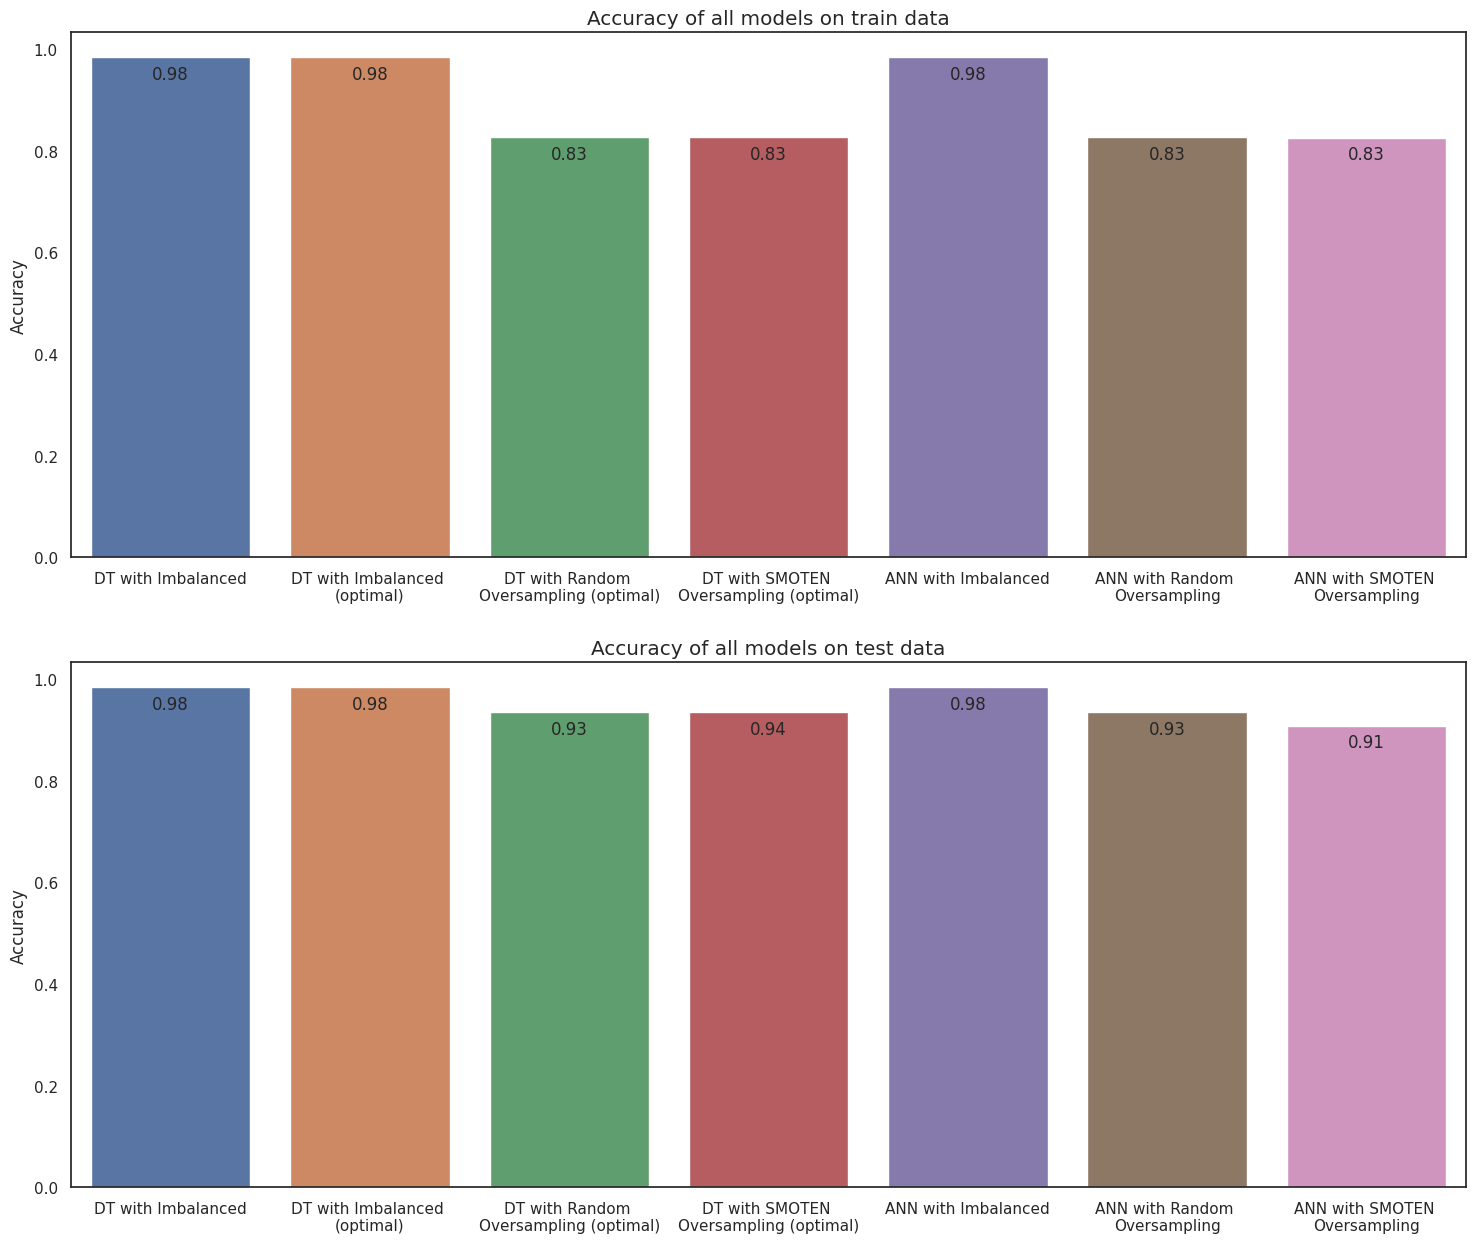

In [132]:
summarize_model(model_summary_train, model_summary_test,"Accuracy")

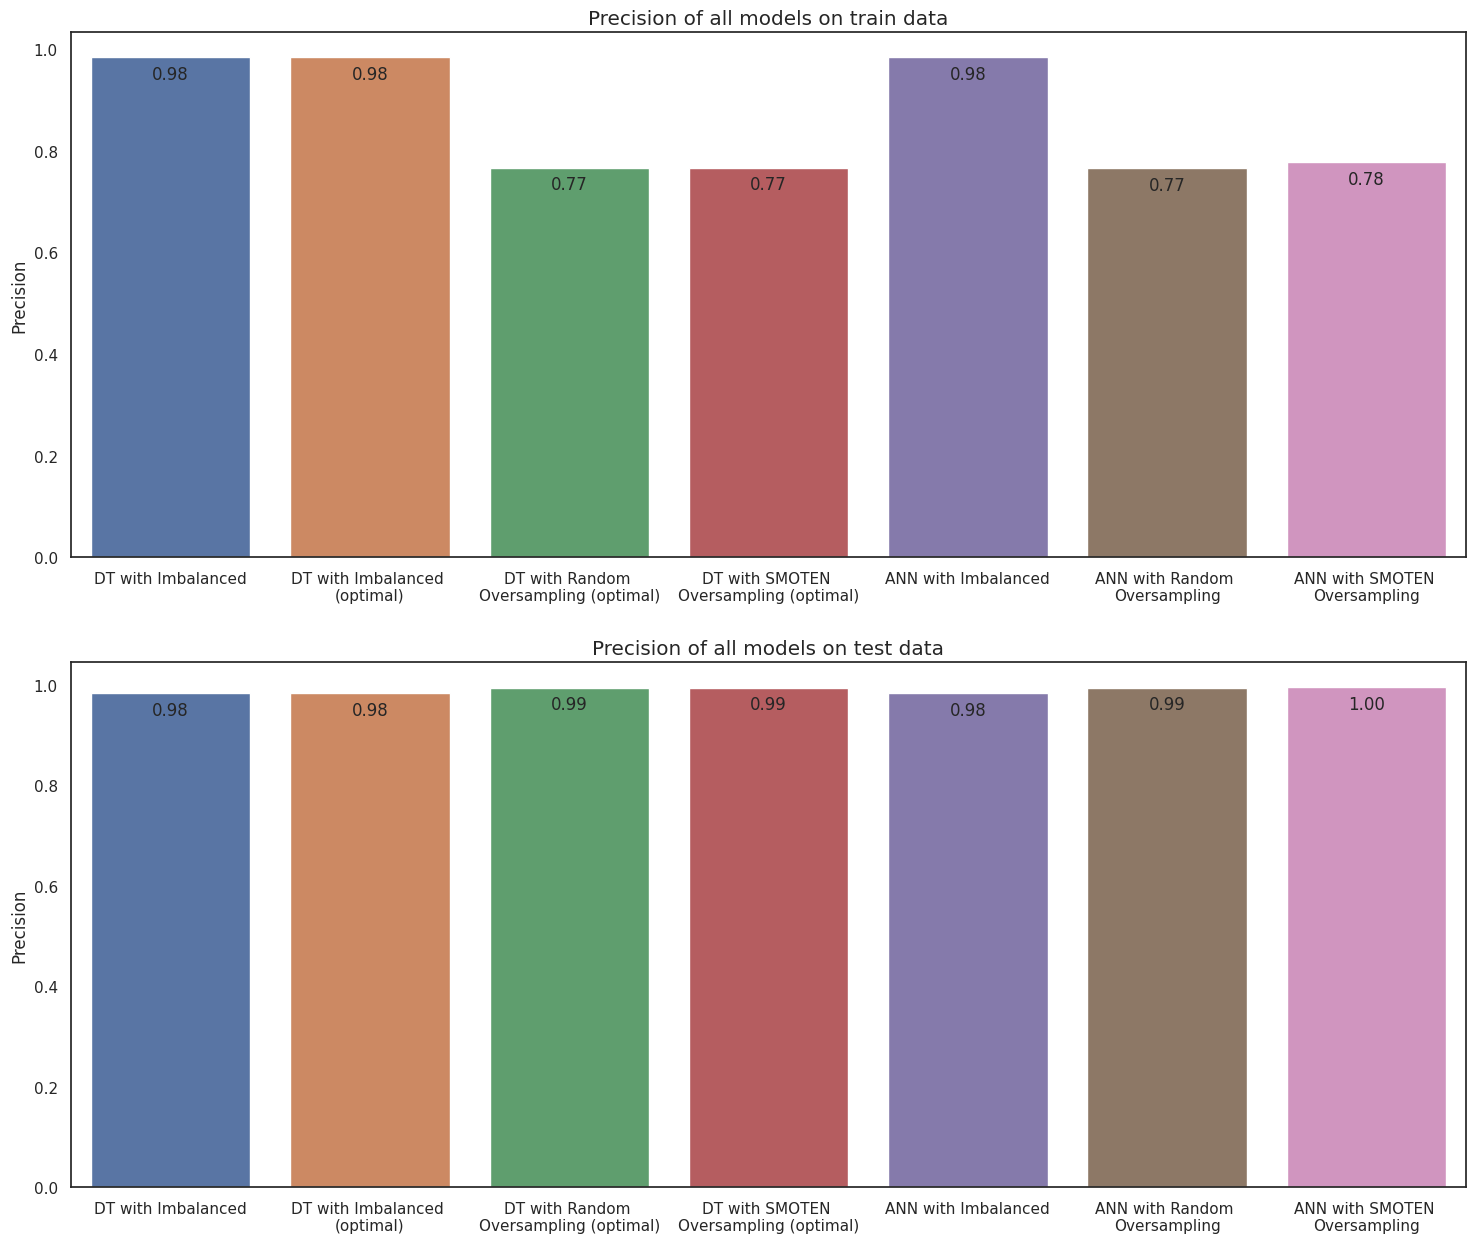

In [133]:
summarize_model(model_summary_train, model_summary_test,"Precision")

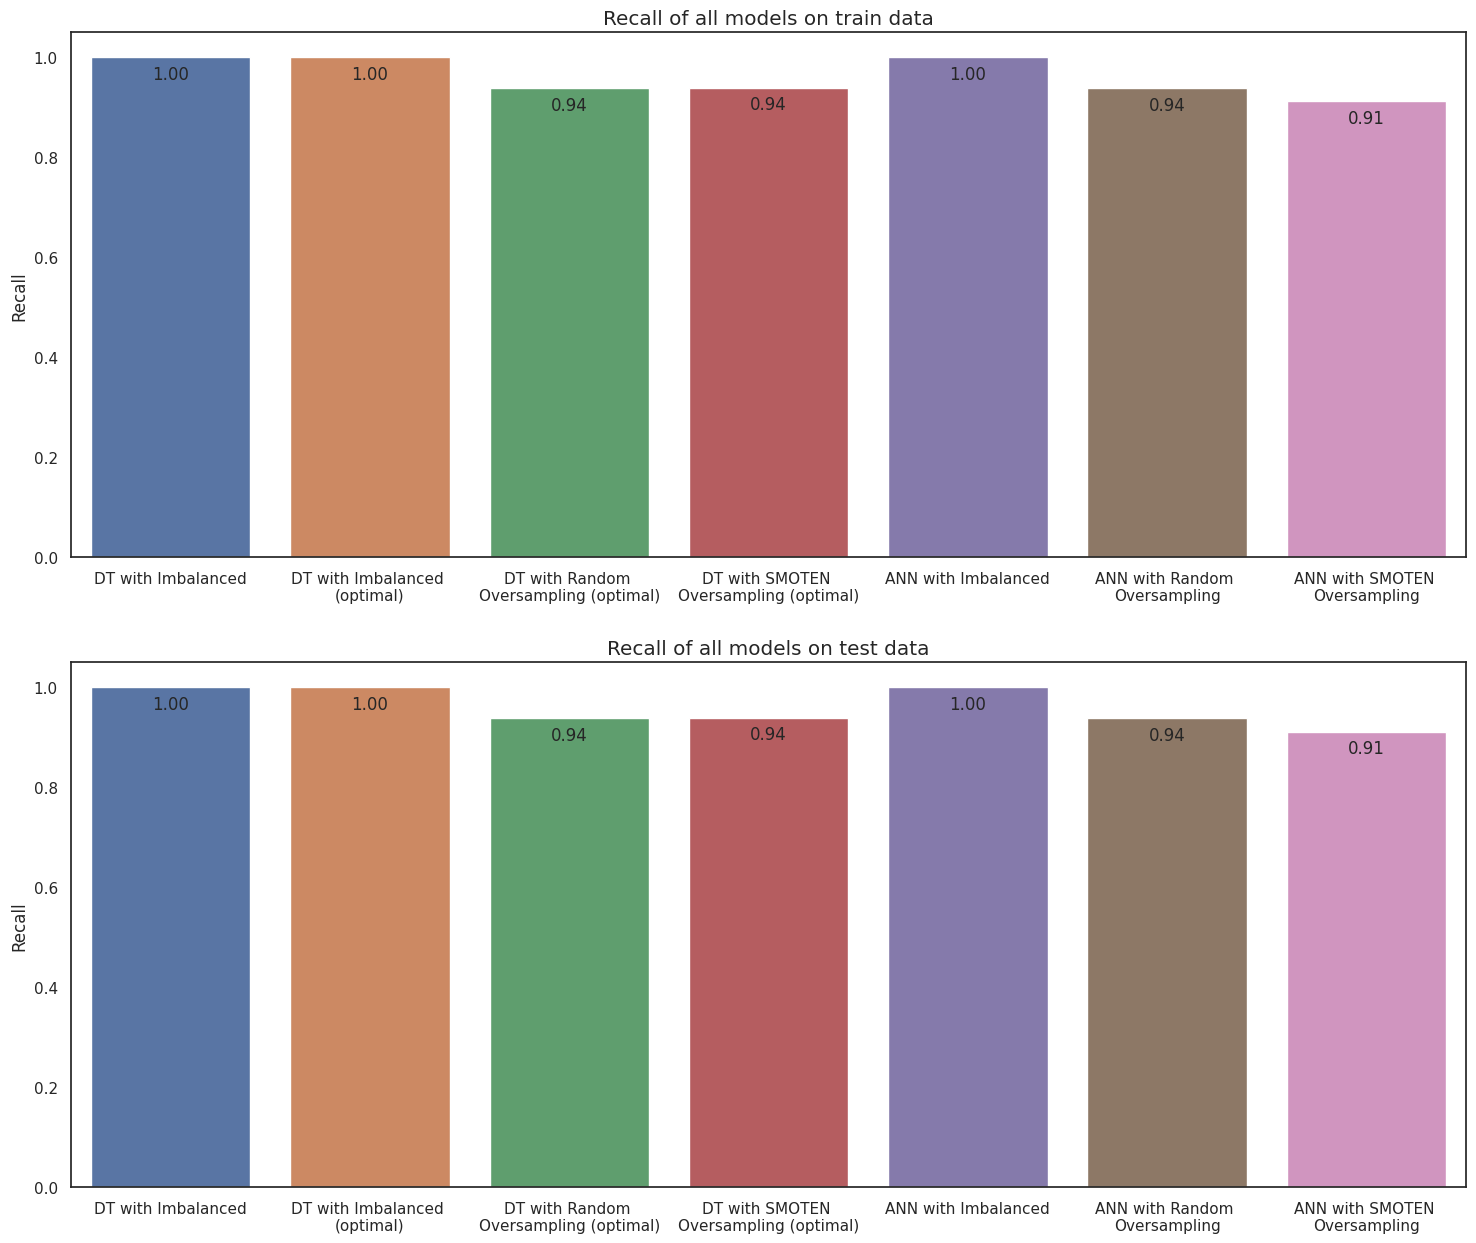

In [134]:
summarize_model(model_summary_train, model_summary_test,"Recall")

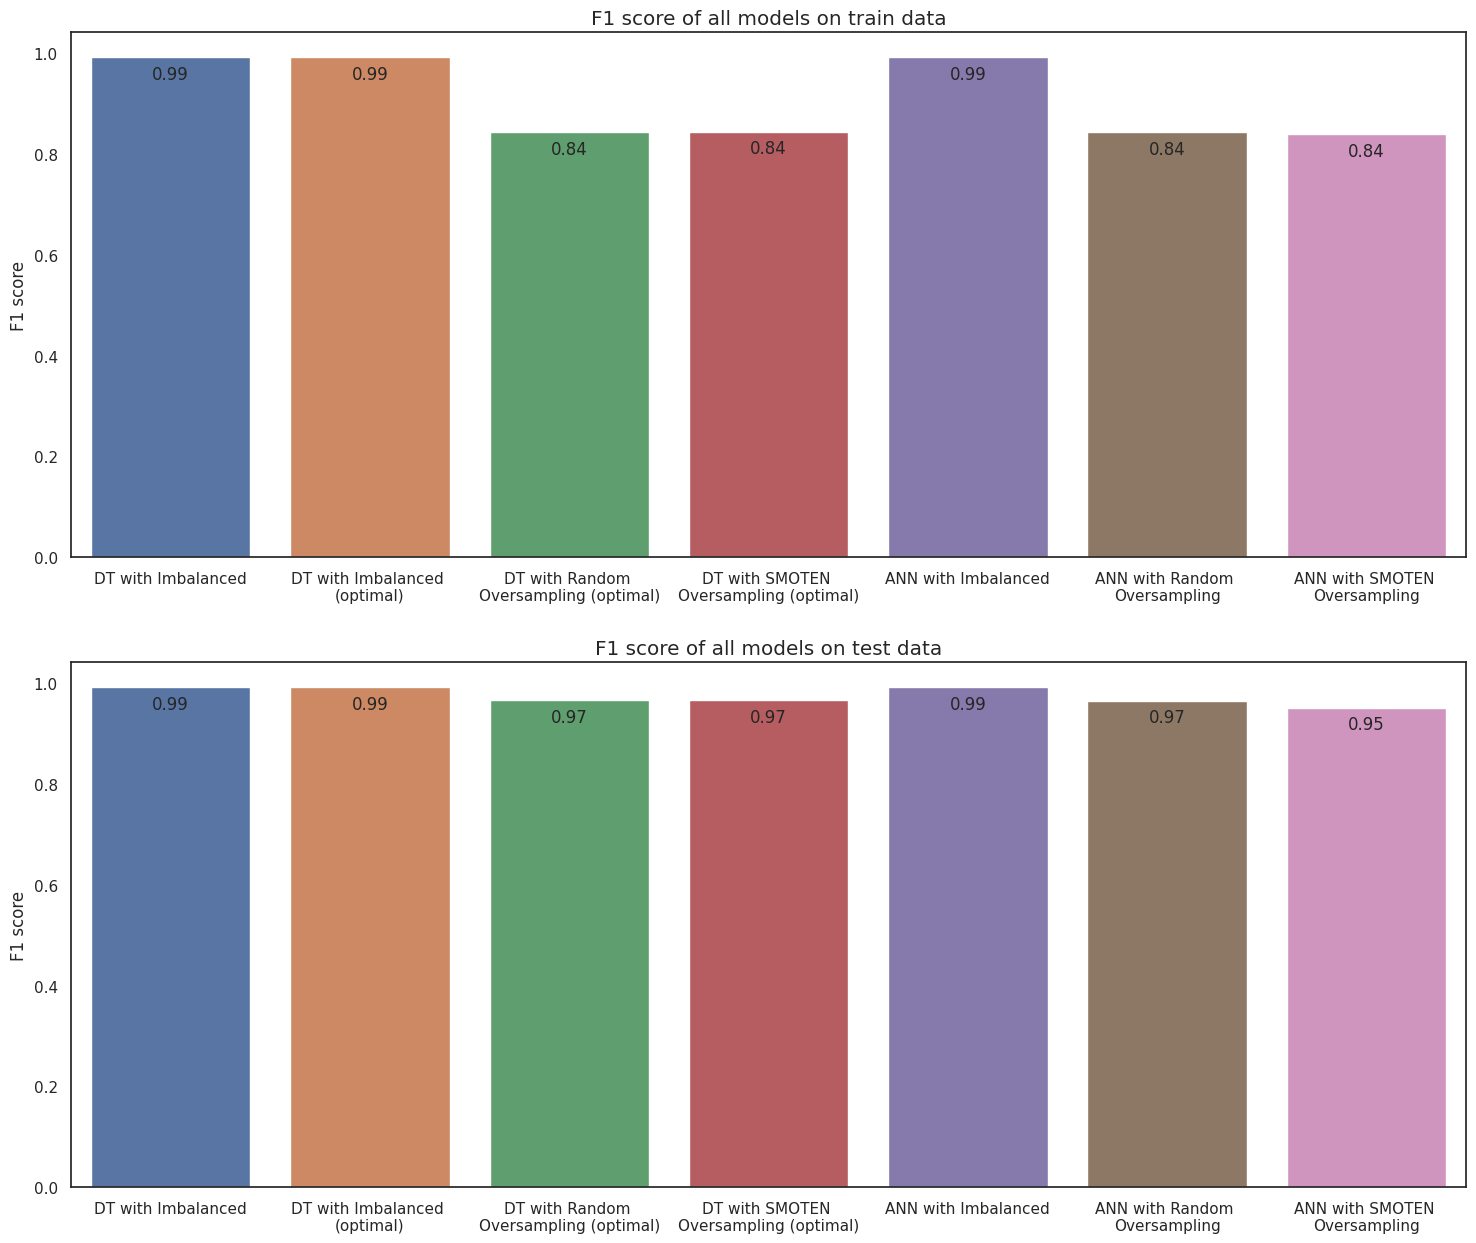

In [135]:
summarize_model(model_summary_train, model_summary_test,"F1 score")

Our focus here is to look at the accuracy score and also the recall score that reflects on the false negative rate. As one of our objectives is to determine if there are any biases for a police to stop someone based on their gender, race, age etc, we would not want to falsely predict if a person is stopped without valid reason just because of his/her age, gender, race etc, which could cause the public to question on the justice system in San Francisco.


By looking at the test data performance, the best model would be decision tree with depth=6, decision tree with optimal depth found using K-Fold cross validation, and Artificial Neurat Network (ANN) that are trained with imbalanced data, with an accuracy score of 0.98 and a recall score of 1.00. Contrastly, what interesting is we can see that the accuracy and recall on the models trained with oversampled data is slightly lower due to the possible reason that oversampling puts more weight to the minority class that makes the model overfit to it.